In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [5]:
SCORE_DIR = './mnist_curv_scores'

In [6]:
def load_scores_for_dir(dir_path, num_runs=5):
    score_dict = dict()
    for i in range(num_runs):
        run_dict = np.load(f'{dir_path}/run_{i+1}.npz')
        scores = run_dict['scores']
        scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
        score_dict[i+1] = scores
    return pd.DataFrame(score_dict)

def load_subset_scores_for_dir(dir_path, num_runs=5):
    total_dict = dict()
    for i in range(num_runs):
        run_dict = np.load(f'{dir_path}/run_{i+1}.npz')
        subset, scores = run_dict['subset'], run_dict['scores']
        scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
        total_dict[f'idxs {i+1}'] = subset
        total_dict[f'scores {i+1}'] = scores[subset]
    return pd.DataFrame(total_dict)

In [7]:
def get_subsets_from_path(dir_path, num_runs=5):
    subset_dict = dict()
    for i in range(num_runs):
        run_dict = np.load(f'{dir_path}/run_{i+1}.npz')
        subset = run_dict['subset']
        subset_dict[i+1] = subset
    return subset_dict

def get_scores_from_path(dir_path, num_runs=5):
    score_dict = dict()
    for i in range(num_runs):
        run_dict = np.load(f'{dir_path}/run_{i+1}.npz')
        scores = run_dict['scores']
        scores = (scores - np.min(scores)) / (np.max(scores) - np.min(scores))
        score_dict[i+1] = scores
    return scores

In [8]:
def get_averages_from_run(dir_path, num_runs=5):
    score_dict = load_scores_for_dir(dir_path, num_runs=num_runs)
    return np.array([np.mean(score_dict[i+1]) for i in range(num_runs)])

def get_averages_from_subsets(dir_path, num_runs=5):
    subset_df = load_subset_scores_for_dir(dir_path, num_runs=num_runs)
    return np.array([np.mean(subset_df[f'scores {i+1}']) for i in range(num_runs)])

In [9]:
def get_triple_from_path(dir_path, size, num_runs=5): # subset size, subset average, base average
    return np.vstack([size * np.ones(num_runs), get_averages_from_subsets(dir_path, num_runs), get_averages_from_run(dir_path, num_runs)])

In [13]:
sizes = [1, 10, 100, 1000, 10000]
fake_averages = np.concat([get_triple_from_path(f'{SCORE_DIR}/fakedata_{size}', size) for size in sizes], axis=1)
kmnist_averages = np.concat([get_triple_from_path(f'{SCORE_DIR}/kmnist_{size}', size) for size in sizes], axis=1)
pinv_averages = np.concat([get_triple_from_path(f'{SCORE_DIR}/pinv_{size}', size) for size in sizes], axis=1)

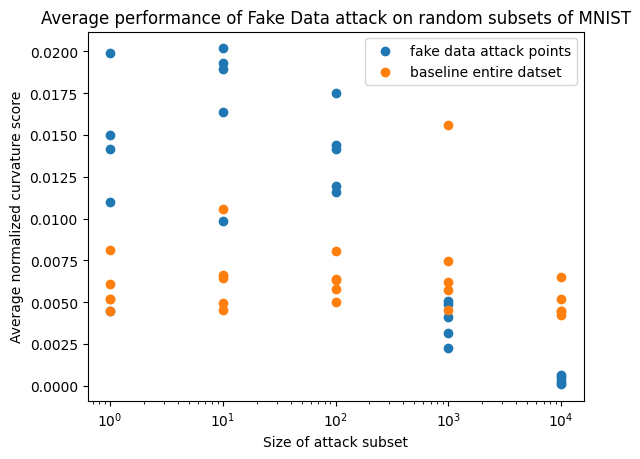

In [11]:
plt.scatter(fake_averages[0, :], fake_averages[1, :], label='fake data attack points')
plt.scatter(fake_averages[0, :], fake_averages[2, :], label='baseline entire datset')
plt.title('Average performance of Fake Data attack on random subsets of MNIST')
plt.xlabel('Size of attack subset')
plt.ylabel('Average normalized curvature score')
plt.xscale('log')
plt.legend()
plt.show()

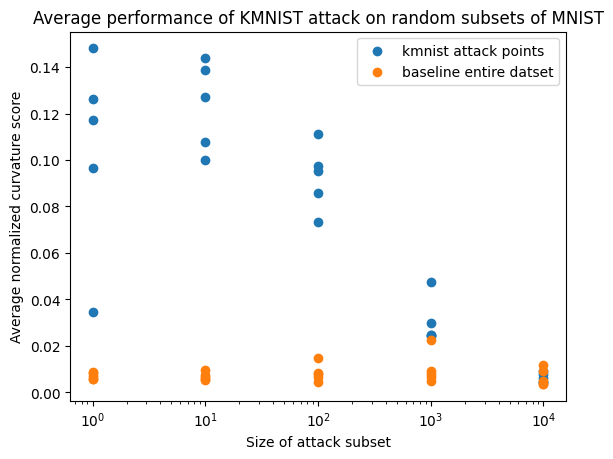

In [14]:
plt.scatter(kmnist_averages[0, :], kmnist_averages[1, :], label='kmnist attack points')
plt.scatter(kmnist_averages[0, :], kmnist_averages[2, :], label='baseline entire datset')
plt.title('Average performance of KMNIST attack on random subsets of MNIST')
plt.xlabel('Size of attack subset')
plt.ylabel('Average normalized curvature score')
plt.xscale('log')
plt.legend()
plt.show()

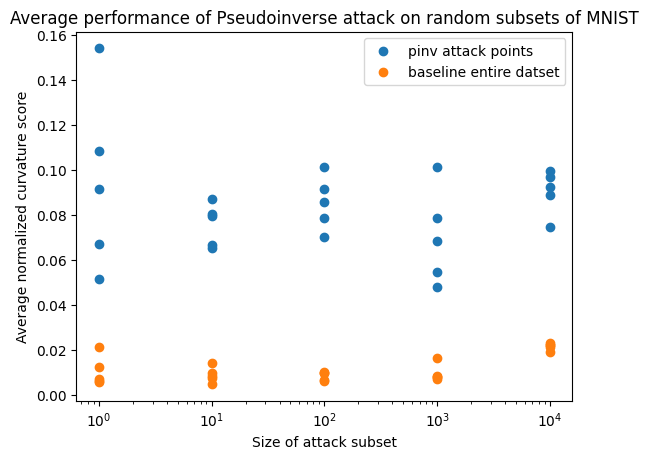

In [12]:
plt.scatter(pinv_averages[0, :], pinv_averages[1, :], label='pinv attack points')
plt.scatter(pinv_averages[0, :], pinv_averages[2, :], label='baseline entire datset')
plt.title('Average performance of Pseudoinverse attack on random subsets of MNIST')
plt.xlabel('Size of attack subset')
plt.ylabel('Average normalized curvature score')
plt.xscale('log')
plt.legend()
plt.show()

In [59]:
pinv1 = load_scores_for_dir(f'{SCORE_DIR}/pinv_1')
pinv1[1][pinv1[1] == 0]

35748    0.0
Name: 1, dtype: float32

In [51]:
pinv_1000 = np.load(f'{SCORE_DIR}/pinv_1/run_5.npz')
pinv_1000['scores']

array([1.9171825e-05, 5.2653000e-08, 6.2861153e-07, ..., 2.1954866e-06,
       3.9858860e-06, 4.5362183e-05], shape=(60000,), dtype=float32)